python code given by `gemini`

## Method 1: Using the google-search-results library

In [7]:
!pip install google-search-results

In [9]:
from serpapi import GoogleSearch

# Define your search query
search_term = "baidu 气"  # Replace "气" with the desired character

# Set API key (get yours from https://serpapi.com/)
#api_key = "6de3838115ca27eccc7c39e93fb8811fddff95d5"

# Perform Google search
search = GoogleSearch(engine="google")
results = search.get_dict(q=search_term)

# Extract the first Baidu search result URL (modify if needed)
if results.get("organic_results"):
    first_result = results["organic_results"][0]
    if first_result.get("link") and "baidu.com" in first_result["link"]:
        baidu_url = first_result["link"]
        print(f"Baidu URL for character '{search_term[1]}': {baidu_url}")
else:
    print(f"No Baidu results found for '{search_term[1]}'")

TypeError: __init__() got an unexpected keyword argument 'engine'

## Method 2: Using the requests library and parsing HTML

In [1]:
!pip install requests

In [2]:
import requests
from bs4 import BeautifulSoup  # For parsing HTML

# Define your search query
search_term = "baidu 气"  # Replace "气" with the desired character
google_search_url = f"https://www.google.com/search?q={search_term}"

# Perform Google search
response = requests.get(google_search_url)

# Parse HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the first Baidu search result (modify logic if needed)
for link in soup.find_all("a"):
    if link.get("href") and "baidu.com" in link.get("href"):
        baidu_url = link.get("href")
        print(f"Baidu URL for character '{search_term[1]}': {baidu_url}")
        break  # Stop after finding the first Baidu result
else:
    print(f"No Baidu results found for '{search_term[1]}'")

Baidu URL for character 'a': /url?q=https://baike.baidu.com/item/%25E6%25B0%2594/35794&sa=U&ved=2ahUKEwi0oufen6OIAxU5QjABHa0HAbEQFnoECAsQAg&usg=AOvVaw05apJkqPki9BhcTO5m9w-Y


above URL does not work

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>baidu 气 - Google Search</title><script nonce="pUTRbikb6BrAP-t4SwPVrQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=google.stvsc&&google.stvsc.rs,f=a?d||window
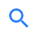

In [3]:
soup 

In [6]:
with open("baidu.html", "w", encoding="utf-8") as f:
    f.write(str(soup))

## Method-3: Ask Claude

In [16]:
import requests
from urllib.parse import quote

def get_baidu_url(character):
    # Encode the Chinese character for use in the URL
    encoded_char = quote(character)
    
    # Construct the Baidu search URL
    search_url = f"https://baike.baidu.com/api/searchui/suggest?wd={encoded_char}"
    
    # Send a GET request to the Baidu API
    response = requests.get(search_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Extract the URL from the response
        return [f"https://baike.baidu.com/item/{i['lemmaTitle']}/{i['lemmaId']}" for i in data['list'] if i['lemmaDesc'] == '汉语汉字']
    else:
        return [] # "Failed to retrieve data from Baidu"

In [22]:
from time import sleep

In [25]:
# Example usage
for chinese_character in [# "气", 
                          "月", "女", "心"]:
    result_url = get_baidu_url(chinese_character)
    if result_url:
        print(result_url[0])
    else:
        print(f"Not Found for {chinese_character}")
    sleep(3)

Not Found for 月
Not Found for 女
Not Found for 心


In [19]:
result_url

['https://baike.baidu.com/item/气/35794']

In [11]:
print(f"Baidu URL for '{chinese_character}': {result_url}")

KeyError: 'lemmaUrl'